# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [71]:
df = pd.read_csv("bfdetection.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2512 non-null   float64
 1   TransactionDate             2512 non-null   object 
 2   CustomerAge                 2512 non-null   int64  
 3   TransactionDuration         2512 non-null   int64  
 4   LoginAttempts               2512 non-null   int64  
 5   AccountBalance              2512 non-null   float64
 6   PreviousTransactionDate     2512 non-null   object 
 7   Location_encoded            2512 non-null   int64  
 8   Channel_encoded             2512 non-null   int64  
 9   TransactionType_encoded     2512 non-null   int64  
 10  CustomerOccupation_encoded  2512 non-null   int64  
 11  TimeBetweenTransaction      2512 non-null   float64
 12  TransactionHour             2512 non-null   int64  
 13  LoginAttempts_Binned        2512 

In [72]:
df = df.drop(columns=['LoginAttempts_Binned','TransactionAmount_Binned','PreviousTransactionDate','TransactionDate'])  
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionAmount           2512 non-null   float64
 1   CustomerAge                 2512 non-null   int64  
 2   TransactionDuration         2512 non-null   int64  
 3   LoginAttempts               2512 non-null   int64  
 4   AccountBalance              2512 non-null   float64
 5   Location_encoded            2512 non-null   int64  
 6   Channel_encoded             2512 non-null   int64  
 7   TransactionType_encoded     2512 non-null   int64  
 8   CustomerOccupation_encoded  2512 non-null   int64  
 9   TimeBetweenTransaction      2512 non-null   float64
 10  TransactionHour             2512 non-null   int64  
 11  KMeans_Cluster              2512 non-null   int64  
 12  Anomaly                     2512 non-null   int64  
 13  DBSCAN_Cluster              2512 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [73]:
print(df.columns)
X = df.drop(columns=['Target'])  
y = df['Target'] 
Xlatih, Xuji, ylatih, yuji = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {Xlatih.shape[0]}, Jumlah data uji: {Xuji.shape[0]}")
df.describe()


Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Location_encoded',
       'Channel_encoded', 'TransactionType_encoded',
       'CustomerOccupation_encoded', 'TimeBetweenTransaction',
       'TransactionHour', 'KMeans_Cluster', 'Anomaly', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_PCA', 'dbscan_outlier', 'DistanceToCentroid',
       'PotentialFraud', 'Target'],
      dtype='object')
Jumlah data latih: 2009, Jumlah data uji: 503


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location_encoded,Channel_encoded,TransactionType_encoded,CustomerOccupation_encoded,TimeBetweenTransaction,TransactionHour,KMeans_Cluster,Anomaly,DBSCAN_Cluster,Cluster,Cluster_PCA,dbscan_outlier,DistanceToCentroid,Target
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966,21.032643,0.991242,0.773885,1.510350,-4.211863e+07,16.626194,1.009554,0.959395,3.357484,0.965366,0.962182,3.357484,3.974512,0.965366
std,291.946243,17.792198,69.963757,0.602662,3900.942499,12.253549,0.809100,0.418398,1.129548,9.191205e+06,0.731059,0.824208,0.282122,11.808524,0.840527,0.823637,11.808524,1.886238,0.840527
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,0.000000,0.000000,0.000000,-5.803267e+07,16.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.390351,0.000000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000,11.000000,0.000000,1.000000,0.000000,-5.016886e+07,16.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,2.283413,0.000000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000,21.000000,1.000000,1.000000,1.500000,-4.195566e+07,16.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,3.883845,1.000000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000,31.000000,2.000000,1.000000,3.000000,-3.408996e+07,17.000000,2.000000,1.000000,-1.000000,2.000000,2.000000,-1.000000,5.505020,2.000000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000,42.000000,2.000000,1.000000,3.000000,-2.657429e+07,18.000000,2.000000,1.000000,57.000000,2.000000,2.000000,57.000000,8.347952,2.000000


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
model = DecisionTreeClassifier( random_state=42)
model.fit(X_train, y_train)


Training set shape: X_train=(2009, 19), y_train=(2009,)
Test set shape: X_test=(503, 19), y_test=(503,)


DecisionTreeClassifier(random_state=42)

Akurasi: 1.0
F1-Score: 1.0


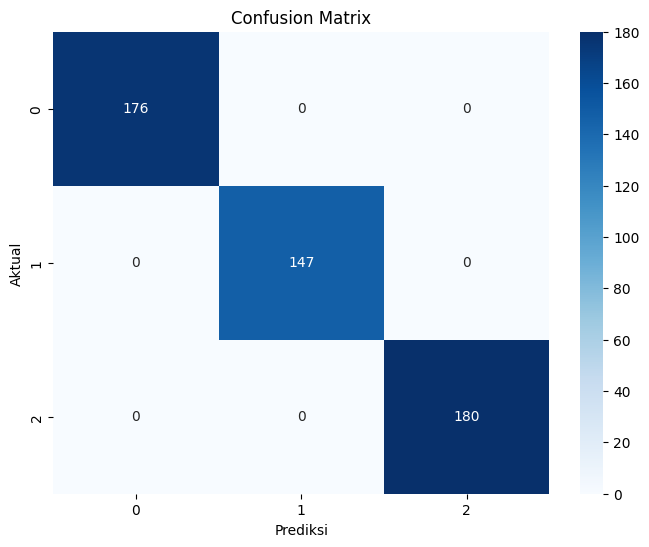

In [75]:

y_predict = model.predict(X_test)

akurasi = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Akurasi: {akurasi}")
print(f"F1-Score: {f1}")

# Membangun Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [76]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [77]:
knn = KNeighborsClassifier().fit(Xlatih, ylatih)
dt = DecisionTreeClassifier().fit(Xlatih, ylatih)
svm = SVC().fit(Xlatih, ylatih)
nb = GaussianNB().fit(Xlatih, ylatih)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [83]:
scaler = StandardScaler()
Xlatih_scaled = scaler.fit_transform(Xlatih)
Xuji_scaled = scaler.transform(Xuji)

# Melatih model KNN, Decision Tree, SVM, dan Naive Bayes
knn = KNeighborsClassifier().fit(Xlatih_scaled, ylatih)
dt = DecisionTreeClassifier().fit(Xlatih, ylatih)  # Decision Tree tidak perlu distandarisasi
svm = SVC().fit(Xlatih_scaled, ylatih)
nb = GaussianNB().fit(Xlatih, ylatih)  # Naive Bayes juga tidak perlu distandarisasi

# Melakukan prediksi pada data uji
knn_predictions = knn.predict(Xuji_scaled)
dt_predictions = dt.predict(Xuji)
svm_predictions = svm.predict(Xuji_scaled)
nb_predictions = nb.predict(Xuji)

# Menghitung metrik evaluasi untuk setiap model
knn_report = classification_report(yuji, knn_predictions)
dt_report = classification_report(yuji, dt_predictions)
svm_report = classification_report(yuji, svm_predictions)
nb_report = classification_report(yuji, nb_predictions)

# Membuat confusion matrix untuk setiap model
knn_conf_matrix = confusion_matrix(yuji, knn_predictions)
dt_conf_matrix = confusion_matrix(yuji, dt_predictions)
svm_conf_matrix = confusion_matrix(yuji, svm_predictions)
nb_conf_matrix = confusion_matrix(yuji, nb_predictions)

# Menampilkan hasil evaluasi
print("KNN Evaluation Report:")
print(knn_report)

print("Decision Tree Evaluation Report:")
print(dt_report)

print("SVM Evaluation Report:")
print(svm_report)

print("Naive Bayes Evaluation Report:")
print(nb_report)

print("KNN Confusion Matrix:")
print(knn_conf_matrix)

print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

print("SVM Confusion Matrix:")
print(svm_conf_matrix)

print("Naive Bayes Confusion Matrix:")
print(nb_conf_matrix)

KNN Evaluation Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       176
           1       0.96      0.99      0.98       147
           2       0.99      0.96      0.98       180

    accuracy                           0.98       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.98      0.98      0.98       503

Decision Tree Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       180

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

SVM Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      0.99      1.00       

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [79]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
BestModel = gris

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.